## Boston Housing Linear Regression

In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import sys
import matplotlib.pyplot as plt 

# Linear Regression

## Identify Feature and target using corr

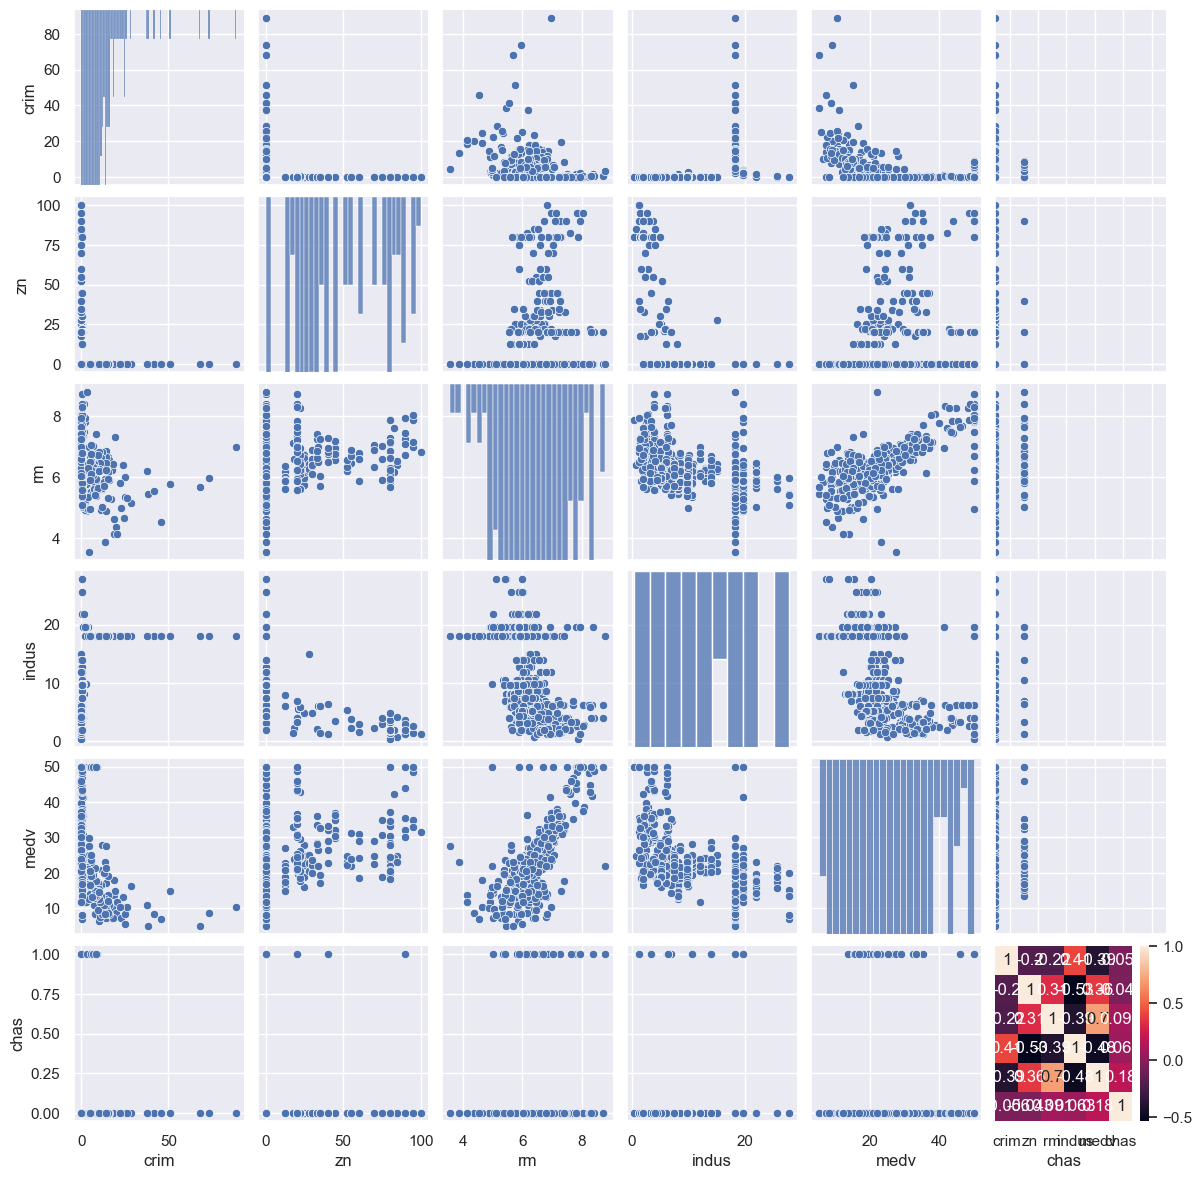

In [22]:
bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
col_study = ['crim','zn','rm','indus','medv','chas']
sns.pairplot(bd[col_study],height=2.0)
sns.color_palette("mako", as_cmap=True)
sns.heatmap(bd[col_study].corr(),annot=True)
plt.show()

## Using linear regressionto predict median value for rooms

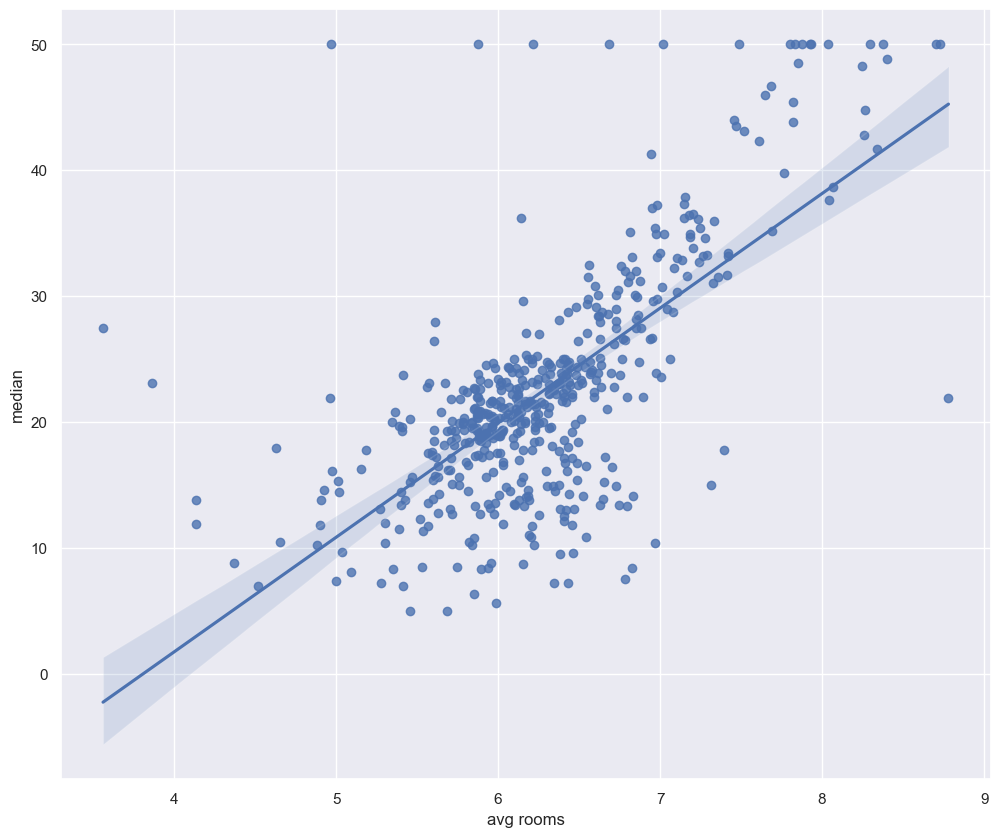

array([47.24836005])

In [23]:
from sklearn.linear_model import LinearRegression

X = bd['rm'].values.reshape(-1,1)

y = bd['medv'].values

model = LinearRegression()

model.fit(X,y)

model.coef_

model.intercept_

plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)
plt.xlabel('avg rooms')
plt.ylabel('median')
plt.show()

model.predict(np.array([9]).reshape(-1,1))

## Linear regression to predict median value of homes given % of lstat 

array([20.30310057])

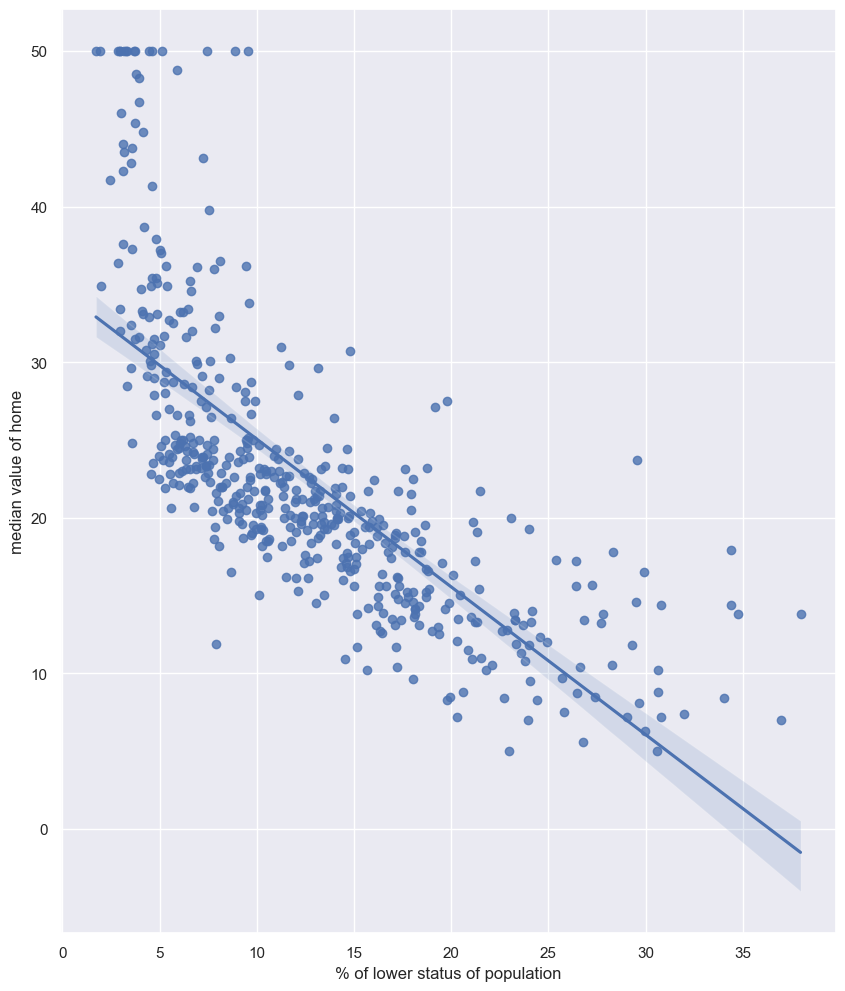

In [24]:
lX = bd['lstat'].values.reshape(-1,1)

ly = bd['medv'].values

model_two = LinearRegression()

model_two.fit(lX,y)

plt.figure(figsize=(10,12))
sns.regplot(x=lX,y=y)
plt.xlabel('% of lower status of population')
plt.ylabel('median value of home')

model_two.predict(np.array([15]).reshape(-1,1))

# Robust Regression

In [25]:
y = bd['medv'].values

array([10.66692234])

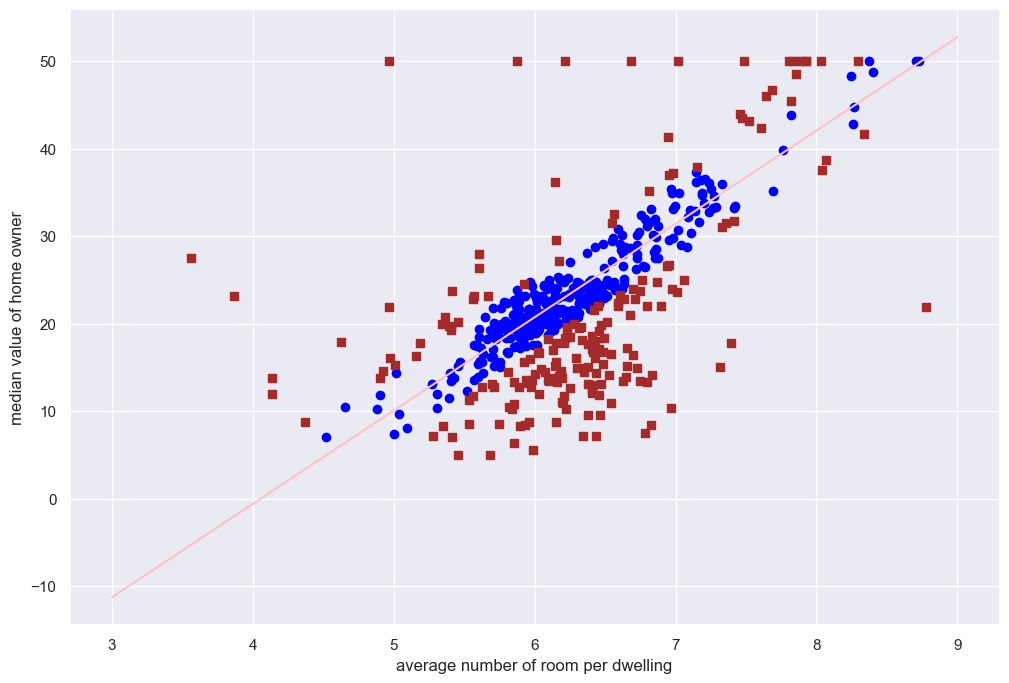

In [26]:
X = bd['rm'].values.reshape(-1,1)

y = bd['medv'].values

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()

ransac.fit(X,y)

inlierMask = ransac.inlier_mask_
outlierMask = np.logical_not(inlierMask)

line_X = np.arange(3,10,1)
line_y = ransac.predict(line_X.reshape(-1,1))

sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlierMask], y[inlierMask],c='blue', marker='o',label='Inlier')
plt.scatter(X[outlierMask],y[outlierMask], c='brown', marker = 's',label = 'Outlier')
plt.plot(line_X,line_y,color = 'pink')
plt.xlabel('average number of room per dwelling')
plt.ylabel('median value of home owner')

ransac.estimator_.coef_

# Performance analysis 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = bd['lstat'].values.reshape(-1,1)
y = bd['medv'].values
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

## Mean Squared Method

In [28]:
mean_squared_error(y_train,y_train_predict)

mean_squared_error(y_test,y_test_predict)

46.336305360025925

## Coefficient of Determination R^2

In [29]:
from sklearn.metrics import r2_score

print(r2_score(y_train,y_train_predict))

print(r2_score(y_test,y_test_predict))

0.571031588576562
0.43095672846187605
